In [1]:
import djlib as dj
import numpy as np 
import matplotlib.pyplot as plt
import json
import pickle
from glob import glob
import os

In [2]:
cross_validation_directory = '/home/derick/experiments/bayes_hyperparam_crossval_ZrN_FCC'

In [3]:
train_avg = []
test_avg = []
eci_variance_args = []
eci_means_rms = []

hyperparam_dirs = glob(os.path.join(cross_validation_directory,'*'))
for hyperparam_selection in hyperparam_dirs:
    if os.path.isdir(hyperparam_selection):
        results = dj.clex.kfold_analysis(hyperparam_selection)
        train_avg.append(np.mean(results['train_rms']))
        test_avg.append(np.mean(results['test_rms']))
        eci_means_rms.append(results['eci_mean_testing_rms'])

        #get parameter information
        with open(os.path.join(hyperparam_selection,'crossval_0', 'run_info.json'), 'r') as f:
            eci_variance_args.append(json.load(f)['eci_variance_args'])
analysis_results = {"train_avg":train_avg, "test_avg":test_avg, "eci_variance_args":eci_variance_args, "eci_means_rms":eci_means_rms}
with open('analysis_results.json', 'w') as f:
    json.dump(analysis_results, f)


In [4]:
with open('analysis_results.json','r') as f:
    analysis_results = json.load(f)

eci_variance_args = np.array(analysis_results['eci_variance_args'])
eci_variance_args = eci_variance_args[:,1]
train_avg = np.array(analysis_results['train_avg'])
test_avg = np.array(analysis_results['test_avg'])
eci_means_rms = np.array(analysis_results['eci_means_rms'])

In [5]:
print(eci_variance_args)
print(test_avg)

[2.000e-01 1.000e+00 4.000e+01 6.000e+02 7.500e+00 1.200e+01 2.000e+00
 1.000e+02 1.425e+01 6.000e+01 1.000e+01 5.250e+00 2.100e+01 2.000e+02
 9.750e+00 1.875e+01 1.650e+01 3.000e+00 5.000e-01 5.000e+00 4.000e+02]
[0.00416622 0.00408415 0.00414791 0.0079356  0.00403082 0.00403702
 0.00406554 0.00454726 0.0040468  0.00427297 0.00403    0.00404082
 0.00406841 0.00519197 0.00403482 0.00405445 0.00409623 0.00406099
 0.00412658 0.00403311 0.0059269 ]


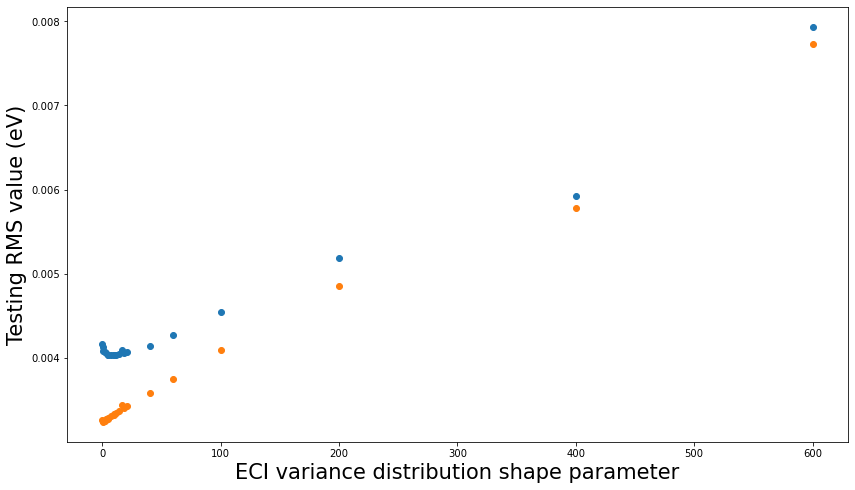

In [6]:
plt.scatter(eci_variance_args, test_avg)
plt.scatter(eci_variance_args, eci_means_rms)
plt.xlabel('ECI variance distribution shape parameter', fontsize=21)
plt.ylabel('Testing RMS value (eV)', fontsize=21)
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.show()